C:\Users\Allien\AppData\Local\Temp\ipykernel_4240\571341996.py:26: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.savefig('valor_por_estado.png')
c:\Users\Allien\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


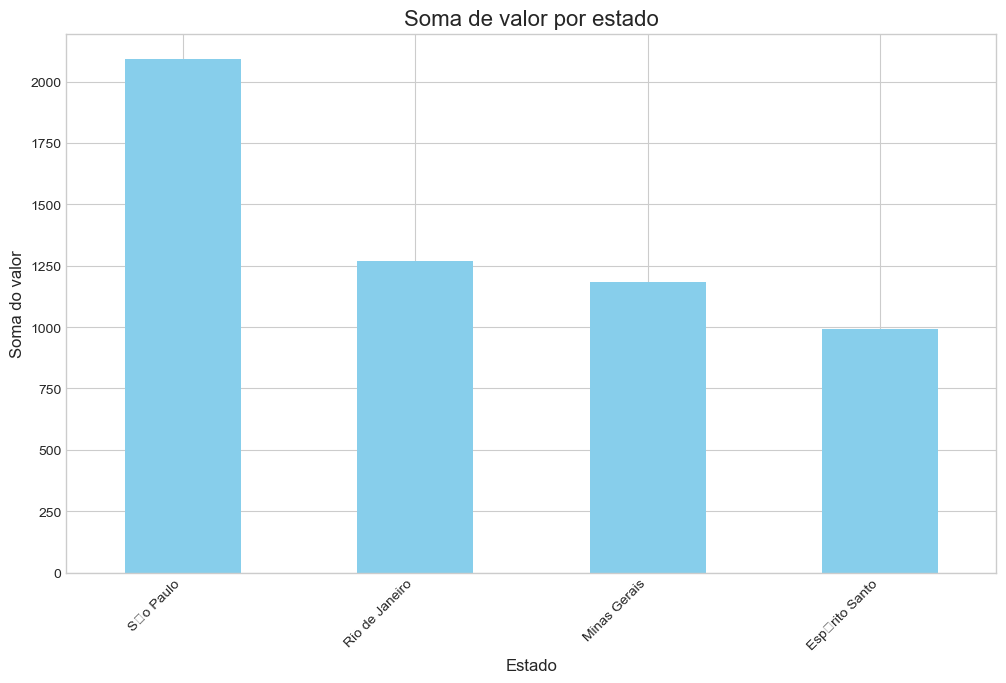

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

def tratar_texto(texto):
    nfkd_form = unicodedata.normalize ("NFKD", texto)
    return "".join ([c for c in nfkd_form if not unicodedata.combining(c)])

df = pd.read_csv("data2.csv", encoding="utf-8")

df['Cidade'] = df['Cidade'].apply(tratar_texto)
df['Estado'] = df['Estado'].apply(tratar_texto)

valor_por_estado = df.groupby('Estado')['Valor'].sum().sort_values(ascending=False)

#criando o gráfico

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure (figsize=(12, 7))
valor_por_estado.plot(kind="bar", color="skyblue")
plt.title ('Soma de valor por estado', fontsize=16)
plt.xlabel ('Estado', fontsize=12)
plt.ylabel ('Soma do valor', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout
plt.savefig('valor_por_estado.png')

df.to_csv("dados_tratados.csv")